In [1]:
import fiona
import geopandas as gpd
import shapely

Cannot find header.dxf (GDAL_DATA is not defined)


In [2]:
data_dir=r'C://Users/kerrie/Documents/02_LocalData/boundaries/'

# I grabbed all the resolutions to see the differences
# I suspect the lowest res will be fine
shapefiles = ['cb_2023_us_state_500k.shp',
              'cb_2023_us_state_5m.shp',
              'cb_2023_us_state_20m.shp'] 

# this subset of states is based on the geographic areas 
# used for wildfire coordination https://gacc.nifc.gov/index.php              
# I would prefer to use fire climate region 14 (https://www.nwcg.gov/publications/pms425-1/12-fire-climate-regions)
# but would need to find the shapefile for that. idk if it exists  
states_list = ['TX','OK','AR','LA','MS','AL','GA','FL','TN','KY','SC','NC','VA'] 


# load and subset lowest res census bureau shapefile

In [14]:
ifile=2
layers=fiona.listlayers(data_dir+'orig/'+shapefiles[ifile])
layers

['cb_2023_us_state_20m']

In [15]:
USstates=gpd.read_file(data_dir+'orig/'+shapefiles[ifile],layer=layers[0])
USstates=USstates.loc[USstates['STUSPS'].isin(states_list)].reset_index(drop=True)
print(USstates.crs)


# reprojecting
USstates=USstates.to_crs("EPSG:4326")
print(USstates.crs)
USstates

EPSG:4269
EPSG:4326


,STATEFP,STATENS,GEOIDFQ,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,48,01779801,0400000US48,48,TX,Texas,00,676686238592,18982083586,"POLYGON ((-106.62345 31.91403, -106.63011 31.9..."
1,21,01779786,0400000US21,21,KY,Kentucky,00,102266598312,2384223544,"POLYGON ((-89.54443 36.57451, -89.47935 36.566..."
2,13,01705317,0400000US13,13,GA,Georgia,00,149485311347,4419673221,"POLYGON ((-85.60516 34.98468, -85.47434 34.983..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102258163252,8528087616,"MULTIPOLYGON (((-76.02348 37.28907, -75.98712 ..."
4,47,01325873,0400000US47,47,TN,Tennessee,00,106792311478,2322248149,"POLYGON ((-90.30070 35.02879, -90.26530 35.040..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111930452904,23721187320,"POLYGON ((-94.04305 32.69303, -94.04303 32.797..."
6,12,00294478,0400000US12,12,FL,Florida,00,138963763779,45970528648,"MULTIPOLYGON (((-81.81169 24.56874, -81.75127 ..."
7,05,00068085,0400000US05,05,AR,Arkansas,00,134660466558,3122251184,"POLYGON ((-94.61792 36.49941, -94.36120 36.499..."
8,28,01779790,0400000US28,28,MS,Mississippi,00,121533540877,3914738613,"POLYGON ((-91.62136 31.26781, -91.56419 31.261..."
9,37,01027616,0400000US37,37,NC,North Carolina,00,125935880061,13453540851,"POLYGON ((-84.28660 35.20576, -84.28322 35.226..."


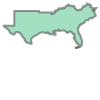

In [16]:
study_area=shapely.ops.unary_union(USstates.geometry)
study_area

In [17]:
study_area.geom_type

'MultiPolygon'

I think the lowest resolution boundaries will be fine for subsetting model and observational data

# write the study area shape to a shapefile

In [18]:
# write the study area shape to a new shapefile
schema={'geometry':'MultiPolygon',
        'properties':{'id':'int'}}

with fiona.open(data_dir+'study_area.shp','w','ESRI Shapefile',schema,crs=fiona.crs.from_epsg(4326)) as f:
    f.write({'geometry':shapely.geometry.mapping(study_area),'properties':{'id':0}})

In [19]:
test=gpd.read_file(data_dir+'study_area.shp')#,layer=layers[0])
test

,id,geometry
0,0,"MULTIPOLYGON (((-81.42742 30.69802, -81.44310 ..."


<Axes: >

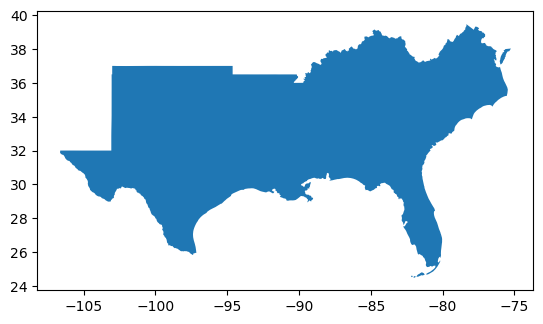

In [20]:
test.plot()

In [21]:
print(test.crs)

EPSG:4326


# write rectangular bounding box to shapefile

for crude subsetting of large data files

Polygon


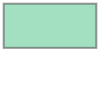

In [22]:
boundbox = study_area.envelope
print(boundbox.geom_type)
boundbox

In [23]:
# write to new shapefile
schema={'geometry':'Polygon',
        'properties':{'id':'int'}}

with fiona.open(data_dir+'study_area_bounding_box.shp','w','ESRI Shapefile',schema,crs=fiona.crs.from_epsg(4326)) as f:
    f.write({'geometry':shapely.geometry.mapping(boundbox),'properties':{'id':0}})